In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
#Cargo mis dos bases de datos y fusiono
database1 = "data/winemag-data_first150k.csv"
df1 = pd.read_csv(database1)
database2 = "data/winemag-data-130k-v2.csv"
df2 = pd.read_csv(database2)

#comparo las columnas porque quiero fusionar y luego limpiar la infomacion que no me interesa
print(df1.columns)
print(df2.columns)
columnas_comunes = df1.columns.intersection(df2.columns)
print(columnas_comunes)

#Fusiono las dos bases de datos con un left join
df_wine = pd.merge(df1, df2, how="outer" , on=list(columnas_comunes))
df_wine = df_wine.drop(columns=['taster_twitter_handle', 'title', 'taster_name'])


print(df_wine.head())


Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')
Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')
Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')
   Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           0        US  This tremendous 100% varietal wine hails from ...   
2           1  Portugal  This is ripe and fruity, a wine that is smooth...   
3           1     Spain  Ripe aromas of fig, blackberry and cassis are ...   
4           2        US  Mac Watson honors the mem

In [17]:
#Quitar duplicados
duplicados = df_wine.duplicated().sum()
print(f"Total de filas duplicadas: {duplicados}")

#Quiero ver la cantidad de NaN por columna que tengo al fusionar
print(df_wine.isna().sum())
print(df_wine.isna().mean() * 100) 

#Voy a tranformar los valores NaN de la region 2 directamente con el valor de region 1
df_wine['region_2'] = df_wine['region_2'].fillna(df_wine['region_1'])

# Eliminar las filas que tengan NaN en la columna 'region_1' y precio
df_wine = df_wine.dropna(subset=['region_1'])
df_wine = df_wine.dropna(subset=['price'])

#Cambiaremos las designaciones que es un parametro que no me resulta del todo importante por el valor "Desconocido"
df_wine['designation'] = df_wine['designation'].fillna('Desconocido')

# Verificar si se eliminaron las filas correctamente
print(df_wine.head())

#compruebo el numero de filas, tenia 280899 y ahora 215792
numero_filas = df_wine.shape[0]
print("Número de filas en el DataFrame:", numero_filas)



Total de filas duplicadas: 0
Unnamed: 0          0
country            68
description         0
designation     83200
points              0
price           22691
province           68
region_1        46307
region_2       169436
variety             1
winery              0
dtype: int64
Unnamed: 0      0.000000
country         0.024208
description     0.000000
designation    29.619082
points          0.000000
price           8.077964
province        0.024208
region_1       16.485226
region_2       60.318975
variety         0.000356
winery          0.000000
dtype: float64
   Unnamed: 0 country                                        description  \
1           0      US  This tremendous 100% varietal wine hails from ...   
3           1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
4           2      US  Mac Watson honors the memory of a wine once ma...   
5           2      US  Tart and snappy, the flavors of lime flesh and...   
6           3      US  Pineapple rind, lemon p

In [18]:
df_wine.info()
#reseteamos indice
df_wine.reset_index(drop=True, inplace=True)
print(df_wine.head())

<class 'pandas.core.frame.DataFrame'>
Index: 215792 entries, 1 to 280899
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   215792 non-null  int64  
 1   country      215792 non-null  object 
 2   description  215792 non-null  object 
 3   designation  215792 non-null  object 
 4   points       215792 non-null  int64  
 5   price        215792 non-null  float64
 6   province     215792 non-null  object 
 7   region_1     215792 non-null  object 
 8   region_2     215792 non-null  object 
 9   variety      215792 non-null  object 
 10  winery       215792 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 19.8+ MB
   Unnamed: 0 country                                        description  \
0           0      US  This tremendous 100% varietal wine hails from ...   
1           1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2           2      US  Mac Watson honors the

#GRAFICOS QUE NO UTILICE PERO ME AYUDARON CON LAS HIPOTESIS 

Número de Variedades por País:
     country  variety
0  Argentina       75
1  Australia       86
2     Canada       34
3     France      148
4      Italy      200
5      Spain      134
6         US      273


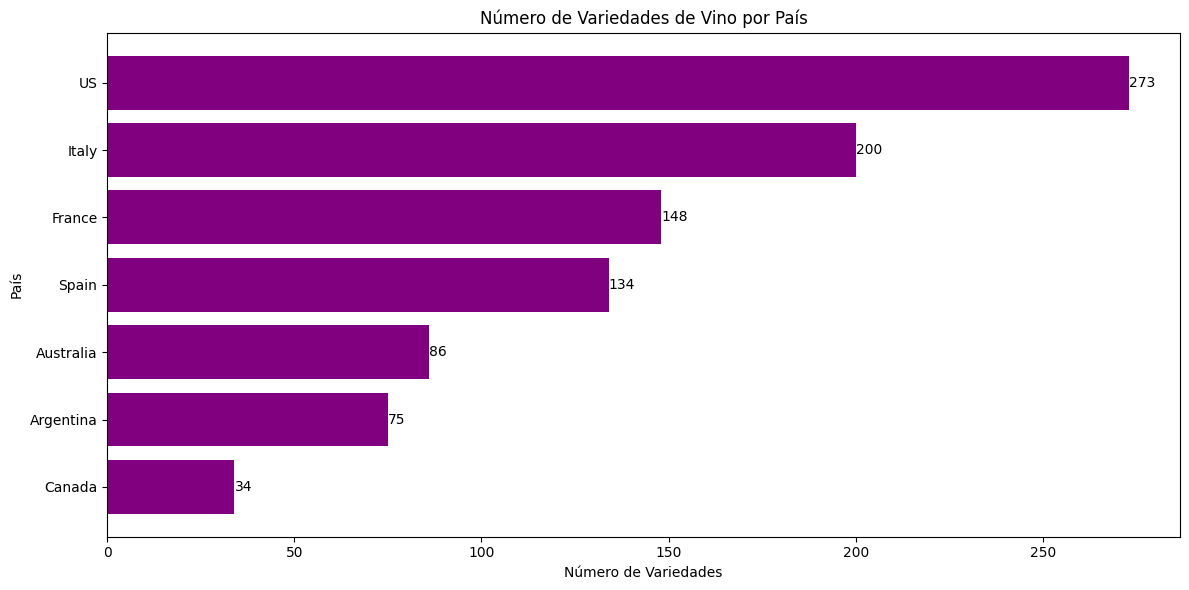

In [27]:
# Contamos cuántas variedades existen por país dentro del database
variedades_por_pais = df_wine.groupby('country')['variety'].nunique().reset_index()


print("Número de Variedades por País:")
print(variedades_por_pais)

variedades_por_pais = variedades_por_pais.sort_values(by='variety', ascending=False).head(7)

plt.figure(figsize=(12, 6))
bars = plt.barh(variedades_por_pais['country'], variedades_por_pais['variety'], color='purple')
plt.xlabel('Número de Variedades')
plt.ylabel('País')
plt.title('Número de Variedades de Vino por País')
plt.gca().invert_yaxis()

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.05, bar.get_y() + bar.get_height() / 2, f'{width:.0f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()




# GRÁFICO DEL NÚMERO DE VARIEDADES DE VINO POR PAÍS
Este gráfico me ayudó a visualizar la cantidad de variedades de vino por país. A pesar de que en EE.UU. había 273 uvas diferentes, el top 5 de variedades eran francesas, lo cual refuerza la idea de que las uvas influyen en el valor del vino.

Me llamó la atención que, aunque Canadá tiene solo 34 variedades, aparecieran algunas autóctonas.

Puntuación Promedio por Variedad y País:
       country                     variety     points
0    Argentina                     Barbera  85.000000
1    Argentina                     Bonarda  86.341176
2    Argentina    Bordeaux-style Red Blend  89.652406
3    Argentina  Bordeaux-style White Blend  83.000000
4    Argentina              Cabernet Blend  89.000000
..         ...                         ...        ...
945         US                 White Blend  87.115294
946         US                  White Port  92.000000
947         US              White Riesling  88.250000
948         US                   Zinfandel  87.149792
949         US                    Zweigelt  87.900000

[950 rows x 3 columns]

Puntuación Más Alta por País:
     country              variety     points
0  Argentina      Malbec-Cabernet  91.666667
1  Australia      Cabernet-Shiraz  96.000000
2     Canada               Malbec  92.000000
3     France       Carignan-Syrah  92.000000
4      Italy             Roviel

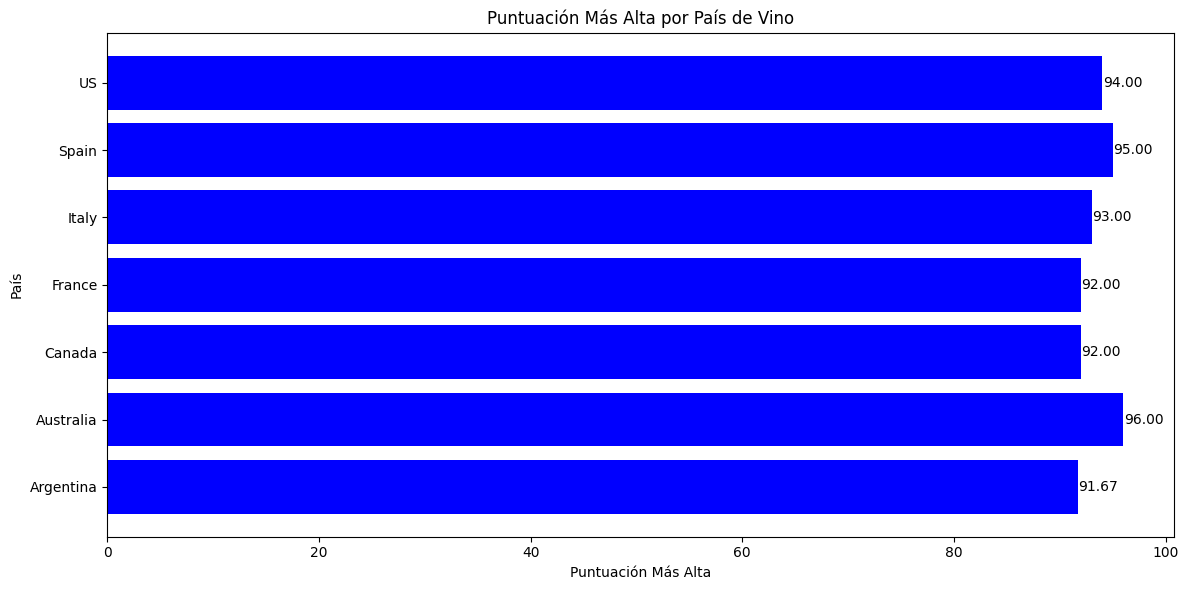

In [34]:
# Agrupamos por país y variedad, luego calculamos la puntuación promedio
puntuacion_promedio_por_variedad_y_pais = df_wine.groupby(['country', 'variety'])['points'].mean().reset_index()

print("Puntuación Promedio por Variedad y País:")
print(puntuacion_promedio_por_variedad_y_pais)

# Obtenemos la puntuación más alta por país
puntuacion_maxima_por_pais = puntuacion_promedio_por_variedad_y_pais.loc[
    puntuacion_promedio_por_variedad_y_pais.groupby('country')['points'].idxmax()
].reset_index(drop=True)

print("\nPuntuación Más Alta por País:")
print(puntuacion_maxima_por_pais)

plt.figure(figsize=(12, 6))
bars = plt.barh(puntuacion_maxima_por_pais['country'], puntuacion_maxima_por_pais['points'], color='blue')
plt.xlabel('Puntuación Más Alta')
plt.ylabel('País')
plt.title('Puntuación Más Alta por País de Vino')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.05, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()


# GRÁFICO DE LAS PUNTUACIONES MÁS ALTAS POR PAÍS
Es interesante observar que países competitivos como España obtuvieran una de las notas más altas entre todos los países, mientras que Francia e Italia, conocidos por tener muchas puntuaciones elevadas, se encuentran por debajo de varios otros países en este análisis.


Precio Promedio por Variedad y País:
       country                     variety      price
0    Argentina                     Barbera  18.000000
1    Argentina                     Bonarda  15.662745
2    Argentina    Bordeaux-style Red Blend  43.566845
3    Argentina  Bordeaux-style White Blend  14.000000
4    Argentina              Cabernet Blend  32.812500
..         ...                         ...        ...
945         US                 White Blend  21.056471
946         US                  White Port  40.000000
947         US              White Riesling  19.500000
948         US                   Zinfandel  27.900755
949         US                    Zweigelt  27.200000

[950 rows x 3 columns]

Top 10 Variedades con el Precio Promedio Más Alto:
       country                 variety       price
411      Italy                Grenache  230.000000
111  Australia                Muscadel  190.857143
559      Spain                Carignan  177.352941
397      Italy                Franc

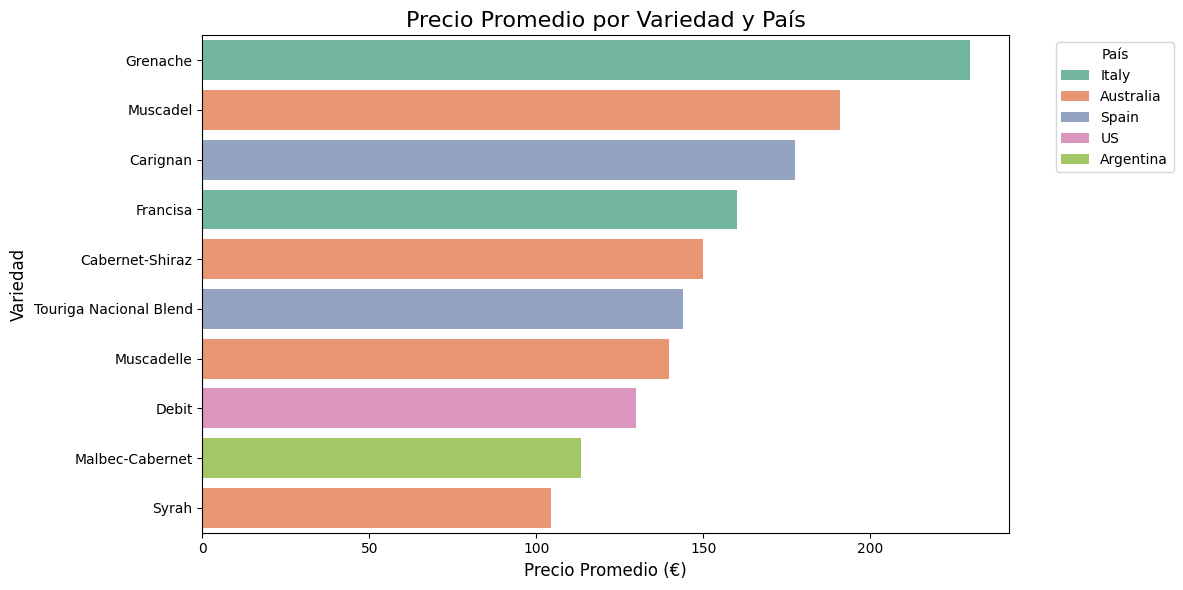

In [ ]:
# Agrupamos por país y variedad, luego calculamos el precio promedio
precio_promedio_por_variedad_y_pais = df_wine.groupby(['country', 'variety'])['price'].mean().reset_index()

print("Precio Promedio por Variedad y País:")
print(precio_promedio_por_variedad_y_pais)

top_variedades_precio = precio_promedio_por_variedad_y_pais.sort_values(by='price', ascending=False).head(10)

print("\nTop 10 Variedades con el Precio Promedio Más Alto:")
print(top_variedades_precio)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_variedades_precio, x='price', y='variety', hue='country', palette='Set2')

plt.title('Precio Promedio por Variedad y País', fontsize=16)
plt.xlabel('Precio Promedio (€)', fontsize=12)
plt.ylabel('Variedad', fontsize=12)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


# GRÁFICO DEL PROMEDIO POR VARIEDADES Y PAÍS
Este fue uno de mis gráficos más interesantes, pero no logré que aparecieran todos los países, lo que hizo que faltara información para poder contrastar los resultados de manera completa.

C:\Users\mario\AppData\Local\Temp\ipykernel_2188\1020657628.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_caros = df_wine.groupby('country').apply(lambda x: x.nlargest(50, 'price')).reset_index(drop=True)


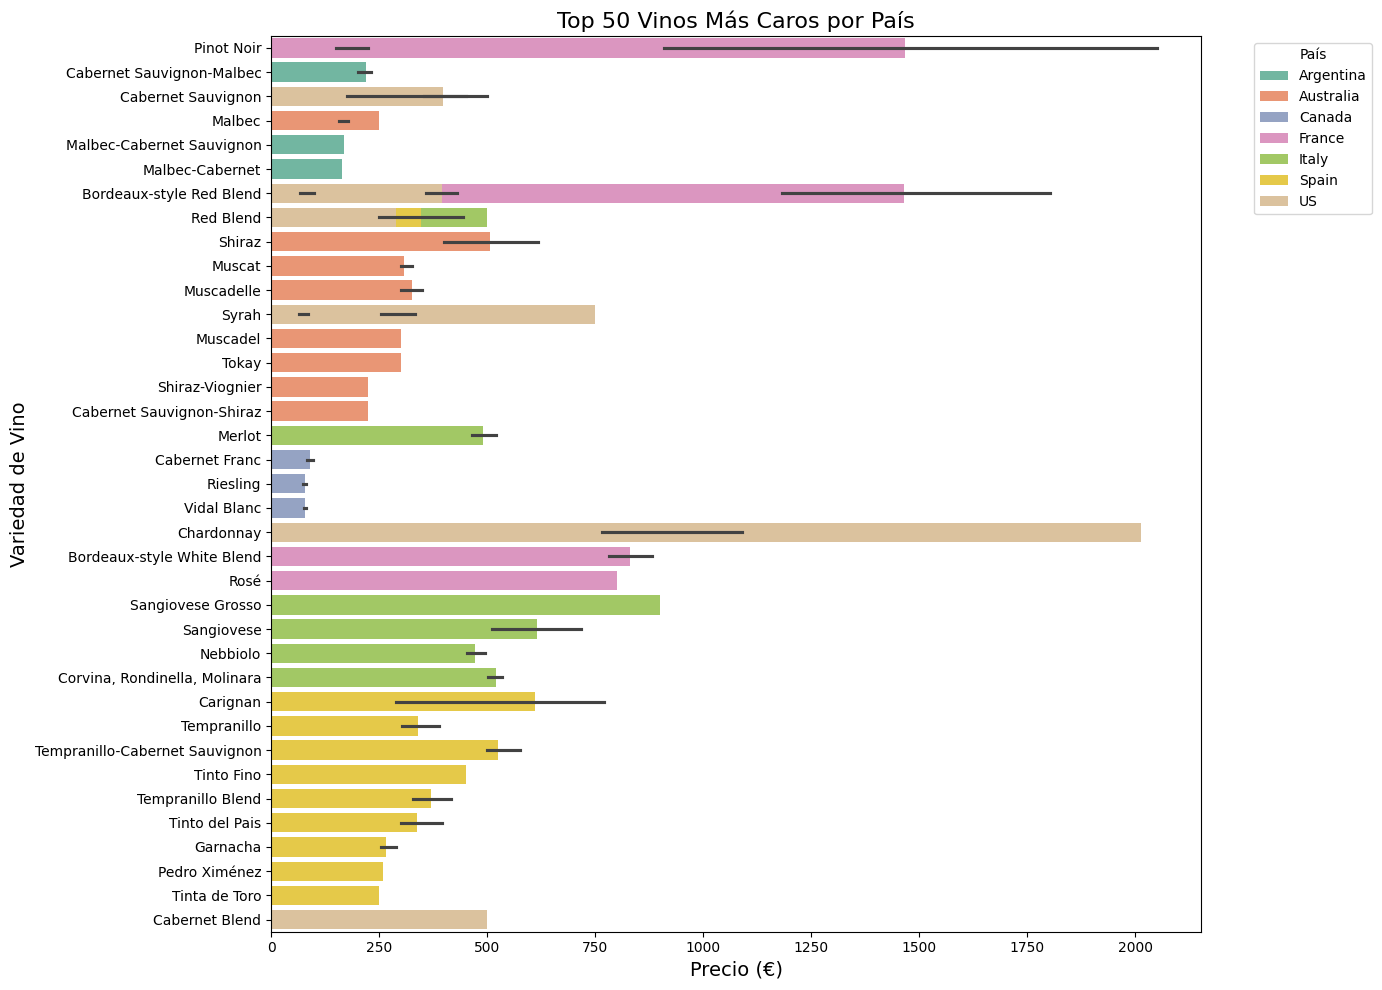

In [38]:
top_10_caros = df_wine.groupby('country').apply(lambda x: x.nlargest(50, 'price')).reset_index(drop=True)

plt.figure(figsize=(14, 10))
sns.barplot(data=top_10_caros, x='price', y='variety', hue='country', dodge=False, palette='Set2')

plt.title('Top 50 Vinos Más Caros por País', fontsize=16)
plt.xlabel('Precio (€)', fontsize=14)
plt.ylabel('Variedad de Vino', fontsize=14)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


C:\Users\mario\AppData\Local\Temp\ipykernel_2188\963452927.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_50_baratos = df_wine.groupby('country').apply(lambda x: x.nsmallest(50, 'price')).reset_index(drop=True)


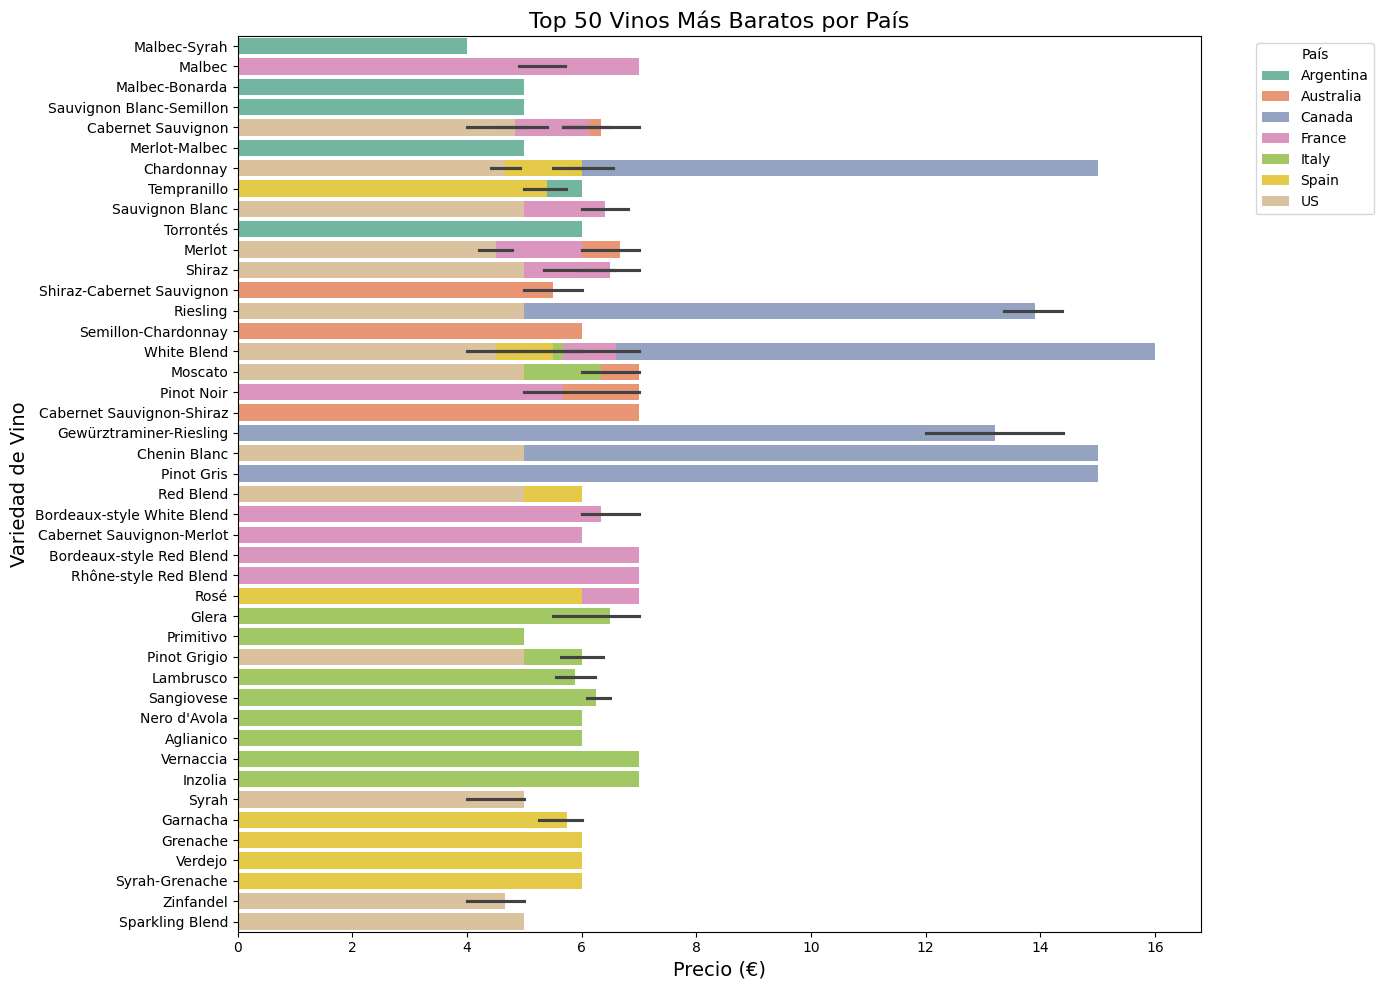

In [39]:
top_50_baratos = df_wine.groupby('country').apply(lambda x: x.nsmallest(50, 'price')).reset_index(drop=True)

plt.figure(figsize=(14, 10))
sns.barplot(data=top_50_baratos, x='price', y='variety', hue='country', dodge=False, palette='Set2')

plt.title('Top 50 Vinos Más Baratos por País', fontsize=16)
plt.xlabel('Precio (€)', fontsize=14)
plt.ylabel('Variedad de Vino', fontsize=14)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# GRÁFICO DEL TOP 50 VINOS MÁS CAROS Y MÁS BARATOS
Este gráfico refuerza la idea presentada en el apartado de variedades: las uvas foráneas tienden a ser mucho más caras, mientras que las autóctonas suelen ser más económicas.